In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import feature_detection
import utils

In [2]:
img_list = utils.load_images('../input_image/parrington')

In [4]:
cm = feature_detection.harris_corner(img_list[0])

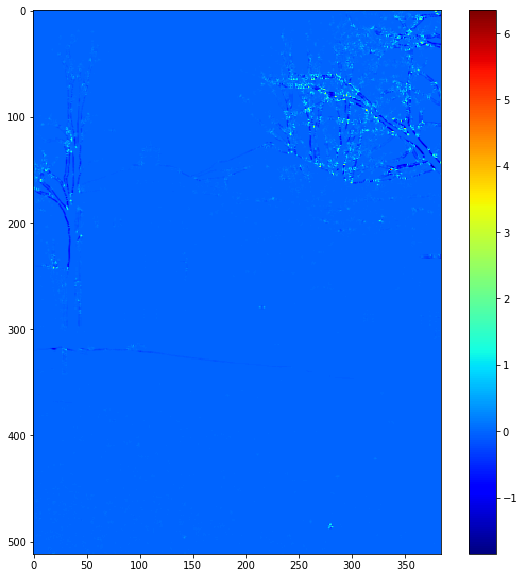

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='jet')
plt.colorbar()
plt.show()